# 03_query_retrieval_test.ipynb

## Purpose
Test product retrieval from ChromaDB: create or load a collection of product embeddings, run example queries, and validate retrieval results.

## Overview
- Load product data and create embeddings
- Insert documents into a Chroma collection (or reuse an existing one)
- Query the collection (top-k) and inspect/validate results
- Measure basic retrieval metrics (accuracy, latency)

## Requirements
- chromadb
- an embeddings provider (e.g., sentence-transformers or OpenAI embeddings)
- pandas, numpy (for data handling)

## How to use
1. Ensure ChromaDB client and embedding model are configured.
2. Run cells in order to build or load the collection.
3. Edit query text and k to test different retrieval scenarios.
4. Use provided assertion/validation cells to verify expected outputs.

## Notes
- Persist collections between runs to avoid repeated indexing.
- For reproducible tests, fix random seeds and document dataset/version.

### Step 1 : Setup ChromaDB Client and Embedding Model

--- 1️⃣ Imports ---

In [1]:
print("hello world")

hello world


In [3]:
%pip install matplotlib

  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

   ---------------------------------------- 0/6 [pyparsing]
   ---------------------------------------- 0/6 [pyparsing]
   ------ --------------------------------- 1/6 [kiwisolver]
   ------------- -


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import pandas as pd
import chromadb
from chromadb.utils import embedding_functions
from IPython.display import display, HTML
import matplotlib.pyplot as plt

--- 2️⃣ Configurations ---

In [5]:
VECTOR_DB_PATH = "C:/Users/shiva/OneDrive/Documents/Material/Amazon_Ecommorce_agent/data/vectorstore/"
COLLECTION_NAME = "products"
EMBED_MODEL = "sentence-transformers/all-MiniLM-L6-v2"


 --- 3️⃣ Load Vectorstore ---

In [7]:
%pip install ipywidgets
%pip install --upgrade jupyter


  Using cached ipywidgets-8.1.8-py3-none-any.whl.metadata (2.4 kB)
Using cached ipywidgets-8.1.8-py3-none-any.whl (139 kB)
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/914.9 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/914.9 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/914.9 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/914.9 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/914.9 kB ? eta -:--:--
   --------------------- ---------------- 524.3/914.9 kB 269.4 kB/s eta 0:00:02
   ---

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\Users\\shiva\\OneDrive\\Documents\\Material\\Amazon_Ecommorce_agent\\venv\\share\\jupyter\\labextensions\\@jupyter-widgets\\jupyterlab-manager\\static\\vendors-node_modules_d3-color_src_color_js-node_modules_d3-format_src_defaultLocale_js-node_m-09b215.2643c43f22ad111f4f82.js'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached notebook-7.4.7-py3-none-any.whl.metadata (10 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached ipywidgets-8.1.8-py3-none-any.whl.metadata (2.4 kB)
  Using cached jupyterlab-4.4.10-py3-none-any.whl.metadata (16 kB)
  Using cached async_lru-2.0.5-py3-none-any.whl.metadata (4.5 kB)
  Using cached jupyter_lsp-2.3.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.17.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyterlab_server-2.28.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached argon2_cffi-25.1.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached jupyter_events-0.12.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached nbforma


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
embedding_function = embedding_functions.SentenceTransformerEmbeddingFunction(
    model_name=EMBED_MODEL
)

client = chromadb.PersistentClient(path=VECTOR_DB_PATH)

# 🔧 FIX: remove embedding_function when loading existing collection
collection = client.get_or_create_collection(name=COLLECTION_NAME)

print(f"✅ Connected to ChromaDB collection: '{COLLECTION_NAME}'")
print(f"📦 Vectorstore path: {VECTOR_DB_PATH}")


✅ Connected to ChromaDB collection: 'products'
📦 Vectorstore path: C:/Users/shiva/OneDrive/Documents/Material/Amazon_Ecommorce_agent/data/vectorstore/


### Step 2: Define a Query Function

--- 4️⃣ Define query function ---

In [15]:
def retrieve_products(query: str, n_results: int = 5):
    """Retrieve top-n similar products for a user query."""
    print(f"\n🔍 Query: {query}\n")

    results = collection.query(
        query_texts=[query],
        n_results=n_results
    )

    if not results or not results.get("metadatas"):
        print("⚠️ No matching results found.")
        return None

    df = pd.DataFrame(results["metadatas"][0])
    df["similarity_score"] = results["distances"][0] if "distances" in results else None
    df = df.rename(columns={
        "name": "Product Name",
        "sub_category": "Sub-Category",
        "discount_price": "Discount Price (₹)",
        "actual_price": "Actual Price (₹)",
        "ratings": "Ratings",
        "no_of_ratings": "No. of Ratings",
        "source_file": "Source"
    })

    # Make the link column short and clickable (opens in new tab)
    def make_clickable(url):
        if pd.isna(url) or str(url).strip() == "":
            return ""
        return f'<a href="{url}" target="_blank" rel="noopener">See the Product</a>'

    df["link"] = df["link"].apply(make_clickable)

    # Display formatted output
    styled = df[[
        "Product Name", "Sub-Category", "Discount Price (₹)",
        "Actual Price (₹)", "Ratings", "No. of Ratings", "link","similarity_score"
    ]].style.bar(subset=["similarity_score"], color='#91c788').set_caption("Top Retrieved Products")

    display(styled)
    return df

### Step 3: Try Example Queries

 --- 5️⃣ Example Queries ---

In [16]:
queries = [
    "Best gaming laptop under ₹70000 with RTX graphics",
    "Affordable wireless earphones with good battery backup",
    "4K smart television between 40 to 50 inches",
    "Stylish smartwatch with heart rate tracking under ₹5000"
]

retrieved_data = {}

for q in queries:
    df = retrieve_products(q, n_results=5)
    if df is not None:
        retrieved_data[q] = df


🔍 Query: Best gaming laptop under ₹70000 with RTX graphics



,Product Name,Sub-Category,Discount Price (₹),Actual Price (₹),Ratings,No. of Ratings,link,similarity_score
0,"ASUS TUF Gaming A15, 15.6-inch (39.62 cms) FHD 144Hz, AMD Ryzen 7 4800H, 4GB NVIDIA GeForce RTX 3050, Gaming Laptop (8GB/5...",All Electronics,67990.000000,92990.000000,4.300000,89.000000,See the Product,0.756770
1,"ASUS TUF Gaming A15, 15.6""(39.62 cms) FHD 144Hz, AMD Ryzen 5 4600H,4GB GeForce GTX 1650 Laptop(8GB/512GB SSD/Win11/Black/...",All Electronics,52990.000000,71990.000000,4.300000,205.000000,See the Product,0.760077
2,"ASUS ROG Strix G17, 17.3""(43.94 cms)FHD 144Hz, AMD Ryzen 7 4800H, RTX 3050ÂTi 4GB Graphics, Gaming Laptop (16GB/1TB SSD/Wi...",All Electronics,85990.000000,121990.000000,4.500000,122.000000,See the Product,0.866766
3,HP Pavilion AMD Ryzen 7 5800H 15.6 inches(39.6cm) FHD Gaming Laptop (16GB/512GB SSD/Windows 11 Home/NVIDIA RTX 3050 Graphi...,All Electronics,75990.000000,92404.000000,4.200000,93.000000,See the Product,0.872258
4,"ASUS Vivobook 16X (2022), 16-inch (40.64 cms) WUXGA, AMD Ryzen 5 5600H, Thin and Light Laptop (8GB/512GB SSD/Integrated Gr...",All Electronics,49943.000000,68990.000000,4.200000,85.000000,See the Product,0.909991



🔍 Query: Affordable wireless earphones with good battery backup



,Product Name,Sub-Category,Discount Price (₹),Actual Price (₹),Ratings,No. of Ratings,link,similarity_score
0,"Best Truly Wireless Single Ear Earbud with Mic to Support Hands-Free Calling, 120 Hours Standby Time, Crystal Clear HD Sound",Headphones,645.000000,2199.000000,4.700000,4.000000,See the Product,0.685607
1,U & I Missile Series 20 Hours Battery Backup True Wireless Earbuds Stereo and Mic,Headphones,1299.000000,3499.000000,5.000000,1.000000,See the Product,0.726540
2,"Earonics True Wireless Earbuds with Upto 20 Hours Playback, stereo Audio, Touch control TWS, Lightweight Earbuds, 8MM Driv...",Headphones,999.000000,2199.000000,4.000000,2.000000,See the Product,0.756785
3,"Wireless Bluetooth Headphones, PowerLocus Bluetooth Headphones Over Ear, Super Bass Hi-Fi Stereo, Soft Earmuffs, Foldable ...",Headphones,6993.000000,10483.000000,4.400000,7128.000000,See the Product,0.776647
4,"U & I Done Series 30 Hours Battery Backup True Wireless Stereo and Mic White (in Ear,True Wireless)",Headphones,1179.000000,3499.000000,3.700000,417.500000,See the Product,0.780108



🔍 Query: 4K smart television between 40 to 50 inches



,Product Name,Sub-Category,Discount Price (₹),Actual Price (₹),Ratings,No. of Ratings,link,similarity_score
0,Samsung 163 cm (65 inches) Wondertainment Series 4K Ultra HD LED Smart TV UA65TUE60AKXXL (Titan Gray),Televisions,81999.000000,129900.000000,4.400000,217.000000,See the Product,0.615380
1,80 cm (32 Inches) Wondertainment Series HD Ready LED Smart TV,Televisions,19245.000000,24790.000000,4.200000,52.000000,See the Product,0.626217
2,80 cm (32 Inches) HD Ready Smart LED TV 32HS550D (Black),Televisions,19245.000000,24790.000000,4.200000,52.000000,See the Product,0.627734
3,80 cm (32 inches) HD Ready Smart LED TV 32LM563BPTC,Televisions,19245.000000,24790.000000,4.200000,52.000000,See the Product,0.638354
4,80 cm (32 Inches) Android HD Ready Frameless Smart LED TV with Smart Remote | (LED-SHF3265) (Black),Televisions,19245.000000,24790.000000,4.200000,52.000000,See the Product,0.645153



🔍 Query: Stylish smartwatch with heart rate tracking under ₹5000



,Product Name,Sub-Category,Discount Price (₹),Actual Price (₹),Ratings,No. of Ratings,link,similarity_score
0,"T500 Smart Watch with Bluetooth Calling, Fitness Tracker, Steps Counter, Heart Rate Monitor",Security Cameras,679.000000,1299.000000,3.300000,4.000000,See the Product,0.576723
1,"T500 Smartwatch with Heart Rate and Blood Pressure Monitor for Men & Women, Bluetooth Calling, Sleep Monitor, Oxygen Monit...",Security Cameras,699.000000,1299.000000,3.300000,4.000000,See the Product,0.592019
2,USM ID116 Smart Watch Smart Bracelet Fitness Tracker Color Screen Smartwatch Heart Rate Blood Pressure Pedometer Sleep Mon...,All Electronics,329.000000,1299.000000,4.800000,7.000000,See the Product,0.647569
3,"Smart Watch D116 for Xiaomi Ml Note 9 Smart Watch Bluetooth SmartWatch with Activity Tracker, Heart Rate Sensor, Sleep Mon...",Cycling,599.000000,1699.000000,1.000000,1.000000,See the Product,0.694832
4,Smart Watch for Men Women ID116 Plus Smart Bracelet Fitness Tracker Color Screen Smartwatch Heart Rate Blood Pressure Pedo...,All Electronics,449.000000,1599.000000,4.700000,69.000000,See the Product,0.698561


### 📊 Step 4: Visualize Similarity Scores

 --- 6️⃣ Visualize top results for a sample query ---

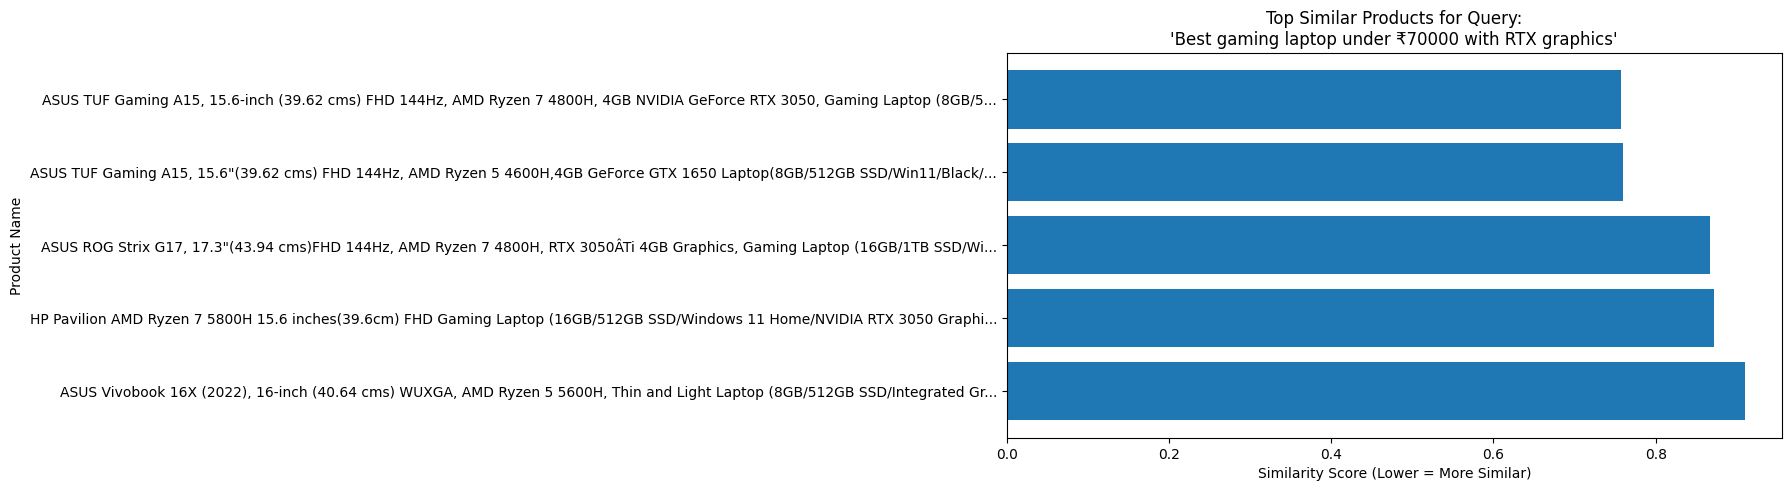

In [17]:
sample_query = queries[0]

if sample_query in retrieved_data:
    df_viz = retrieved_data[sample_query].copy()
    plt.figure(figsize=(10, 5))
    plt.barh(df_viz["Product Name"], df_viz["similarity_score"])
    plt.xlabel("Similarity Score (Lower = More Similar)")
    plt.ylabel("Product Name")
    plt.title(f"Top Similar Products for Query:\n'{sample_query}'")
    plt.gca().invert_yaxis()
    plt.show()

### 🧾 Step 5: — Display Results as Cards (HTML)

--- 7️⃣ Display products in card-style HTML format ---

In [26]:
from IPython.display import HTML, display
import pandas as pd

def display_cards(df, limit=5):
    # Amazon logo fallback (you can change this link to a local or better one)
    amazon_logo = "https://upload.wikimedia.org/wikipedia/commons/a/a9/Amazon_logo.svg"

    html = '<div style="display:flex; flex-wrap:wrap;">'

    for _, row in df.head(limit).iterrows():
        # Safe value extraction
        product = row.get('Product Name', '')
        subcat = row.get('Sub-Category', '')
        discount = row.get('Discount Price (₹)', '')
        actual = row.get('Actual Price (₹)', '')
        ratings = row.get('Ratings', '')
        no_ratings = row.get('No. of Ratings', '')
        link = row.get('link', '')
        similarity = row.get('similarity_score', None)
        image = row.get('image', '')

        # ✅ Handle missing or blank image
        if pd.isna(image) or str(image).strip() == "":
            image = amazon_logo

        # ✅ Prepare HTML-safe product link
        if pd.isna(link) or str(link).strip() == "":
            link_html = ""
        elif str(link).strip().lower().startswith("<a"):
            link_html = str(link)
        else:
            link_html = f'<a href="{link}" target="_blank" rel="noopener">See Product</a>'

        # ✅ Product image
        image_html = f'<img src="{image}" style="width:100%;height:140px;object-fit:cover;border-radius:6px;margin-bottom:8px;" />'

        # ✅ Format numeric safely
        def safe_float(val, fmt="{:.1f}"):
            try:
                return fmt.format(float(val))
            except Exception:
                return str(val)

        def safe_int(val):
            try:
                return f"{int(val)}"
            except Exception:
                return str(val)

        price_text = f"₹{safe_float(discount, '{:,.0f}')}"
        actual_text = f"₹{safe_float(actual, '{:,.0f}')}" if actual else ""
        ratings_text = safe_float(ratings)
        no_ratings_text = safe_int(no_ratings)
        similarity_text = f"{float(similarity):.4f}" if similarity not in [None, "", "nan"] else ""

        # ✅ Build card HTML
        html += f"""
        <div style="border:1px solid #ccc; border-radius:10px; padding:10px; margin:10px; width:280px; vertical-align:top; box-shadow:0 2px 5px rgba(0,0,0,0.1); background:#fff;">
            {image_html}
            <h4 style="color:#0077b6; margin:6px 0 8px 0;">{product}</h4>
            <p style="margin:4px 0;"><b>Category:</b> {subcat}</p>
            <p style="margin:4px 0;"><b>Price:</b> {price_text}"""
        if actual_text:
            html += f""" <del style="color:#777; margin-left:6px;">{actual_text}</del>"""
        html += f"""</p>
            <p style="margin:4px 0;"><b>Ratings:</b> ⭐ {ratings_text} ({no_ratings_text} reviews)</p>
            <p style="margin:6px 0;"><b>Go To Product:</b> {link_html}</p>
            <p style="margin:4px 0;"><b>Similarity:</b> {similarity_text}</p>
        </div>
        """

    html += "</div>"
    display(HTML(html))


In [27]:
# Display for first query
display_cards(retrieved_data[queries[0]])